In [9]:
import geopandas
import leafmap

C:\Users\khale\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [10]:
con = leafmap.connect_postgis(database='GIS', host='localhost', user='postgres', password='postgres')
sqlQ = "SELECT * FROM public.utility"
gdf = leafmap.read_postgis(sqlQ, con, geom_col='geometry')

In [89]:

prob_list = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]
print(prob_list)
gdf.head(50)



[[30.004285, 31.295168], [31.49253, 30.061771], [31.49253, 30.061771], [31.036913, 31.361936], [31.036858, 31.362058], [31.49253, 30.061771], [31.627722, 30.132701], [31.627722, 30.132701]]


,id,sub_type,lat,lon,timestamp,geometry,effect,description,img,solved,solved_time,userid,type
0,1,Leakage,30.004285,31.295168,2022-03-20 19:00:46.486052,POINT (31.29517 30.00428),1,water,3bdeddc2b730a876.jpg,False,None,1,1
1,2,Water,31.492530,30.061771,2022-03-20 19:27:59.137023,POINT (30.06177 31.49253),1,Description,1234,False,None,1,1
2,3,Water,31.492530,30.061771,2022-03-20 19:28:06.836584,POINT (30.06177 31.49253),1,Description,1234,False,None,1,1
3,4,Leakage,31.036913,31.361936,2022-03-20 19:53:16.938415,POINT (31.36194 31.03691),1,nnn,8ed991ec6ebe6fdb.jpg,False,None,1,1
4,5,Leakage,31.036858,31.362058,2022-03-20 20:18:09.470694,POINT (31.36206 31.03686),1,x,7cc193f5304fd896.jpg,False,None,1,1
5,6,Water,31.492530,30.061771,2022-03-20 20:19:53.046769,POINT (30.06177 31.49253),1,Description,1234,False,None,1,1
6,7,Water,31.627722,30.132701,2022-03-20 20:20:32.314965,POINT (30.13270 31.62772),1,Description,1234,False,None,1,1
7,8,Water,31.627722,30.132701,2022-03-20 20:20:36.734742,POINT (30.13270 31.62772),1,Description,1234,False,None,1,1


In [12]:
facilities = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='facilities').to_crs("EPSG:3857") #Point
admin_poly = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='NewCairoPolyDemo').to_crs("EPSG:3857") #Polygon
facilities.head(50)
Egy_fac= geopandas.read_file("../Data/Facilities/EgyptFacilities.gpkg", layer='facilities').to_crs("EPSG:3857") #Point
Egy_fac.head(50)



,osm_id,code,fclass,name,email,phone,geometry
0,33756486,2001,police,None,org1@youssefharby.com,01000000000,POINT (3842434.200 3311540.231)
1,343841275,2110,hospital,الشبراويشى,org1@youssefharby.com,01000000000,POINT (3474960.123 3508876.280)
2,355157578,2001,police,None,org1@youssefharby.com,01000000000,POINT (3818556.024 3231471.389)
3,366500797,2110,hospital,معهد القلب,org1@youssefharby.com,01000000000,POINT (3474259.188 3511878.786)
4,411676470,2110,hospital,مستشفى القوات الجوية,org1@youssefharby.com,01000000000,POINT (3481386.319 3511575.338)
5,411895460,2110,hospital,مركز القاهرة الطبي,org1@youssefharby.com,01000000000,POINT (3486208.234 3515671.220)
6,414554419,2110,hospital,دار المقطم,org1@youssefharby.com,01000000000,POINT (3482677.013 3504994.427)
7,432875457,2001,police,دار السلام أول,org1@youssefharby.com,01000000000,POINT (3477335.302 3501502.702)
8,442338122,2001,police,قسم أول مدينة نصر,org1@youssefharby.com,01000000000,POINT (3488881.928 3512396.112)
9,443368255,2110,hospital,مركز الإيمان الطبي,org1@youssefharby.com,01000000000,POINT (3489374.205 3511805.522)


In [91]:
fac_And_Admin = geopandas.sjoin(Egy_fac,admin_poly[['adm3_ar', 'geometry']], how='left')
fac_And_Admin.rename_geometry('fac_geo', inplace=True)
fac_And_Admin_for_utility = fac_And_Admin.loc[fac_And_Admin['fclass']=='fire_station']
toto = fac_And_Admin_for_utility.to_crs("EPSG:4326")
toto['fac_lat'] = toto['fac_geo'].y
toto['fac_lon'] = toto['fac_geo'].x
geometry = geopandas.points_from_xy(toto.fac_lon, toto.fac_lat)
geo_df_list = [[point.xy[0][0], point.xy[1][0]] for point in toto.fac_geo]


print("--------------------------------------------------")
lastprob=prob_list[-1]
geo_df_list.insert(0,lastprob)
print(geo_df_list)


toto.head(50)


--------------------------------------------------
[[31.627722, 30.132701], [31.368957899999995, 30.067249200000003], [31.7441051, 30.3028631], [31.281973299999997, 30.0563657], [31.330913799999998, 30.094396000000003], [31.2237961, 30.183360299999997], [34.5172483, 28.495024899999997], [32.7207632, 29.591531700000004], [31.459280400000004, 30.883377999999997], [33.830379799999996, 27.239859], [30.760266600000005, 28.09504220000001], [30.941887199999996, 29.978313999999997], [34.778616799999995, 25.261348099999996], [31.185490000000005, 27.196521399999998], [31.395656400000004, 31.047463799999992], [31.388908199999992, 31.048263999999996], [31.3267534, 30.105157900000002], [29.9930528, 31.24089799999999], [31.31218459999999, 30.100378900000003], [31.2462273, 30.117107200000003], [34.109483399999995, 31.232817099999995], [31.832260899999998, 31.5087551], [27.109660600000005, 30.781374199999995]]


,osm_id,code,fclass,name,email,phone,fac_geo,index_right,adm3_ar,fac_lat,fac_lon
16,512417734,2002,fire_station,None,org1@youssefharby.com,01000000000,POINT (31.36896 30.06725),NaN,NaN,30.067249,31.368958
20,570066363,2002,fire_station,None,org1@youssefharby.com,01000000000,POINT (31.74411 30.30286),NaN,NaN,30.302863,31.744105
228,987129754,2002,fire_station,None,org1@youssefharby.com,01000000000,POINT (31.28197 30.05637),NaN,NaN,30.056366,31.281973
251,1195158320,2002,fire_station,محطة إطفاء صلاح الدين,org1@youssefharby.com,01000000000,POINT (31.33091 30.09440),NaN,NaN,30.094396,31.330914
284,1501997088,2002,fire_station,None,org1@youssefharby.com,01000000000,POINT (31.22380 30.18336),NaN,NaN,30.183360,31.223796
287,1755546521,2002,fire_station,None,org1@youssefharby.com,01000000000,POINT (34.51725 28.49502),NaN,NaN,28.495025,34.517248
289,1784962231,2002,fire_station,None,org1@youssefharby.com,01000000000,POINT (32.72076 29.59153),NaN,NaN,29.591532,32.720763
294,1824916904,2002,fire_station,مطافي السنبلاوين,org1@youssefharby.com,01000000000,POINT (31.45928 30.88338),NaN,NaN,30.883378,31.459280
295,1825138368,2002,fire_station,None,org1@youssefharby.com,01000000000,POINT (33.83038 27.23986),NaN,NaN,27.239859,33.830380
304,1889173608,2002,fire_station,Fire Station,org1@youssefharby.com,01000000000,POINT (30.76027 28.09504),NaN,NaN,28.095042,30.760267


In [14]:
from xml.etree.ElementTree import tostring
import requests
import json

In [15]:
z=[]
for i in range(len(geo_df_list)-1):
    z.append(i+1)
print(z)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


In [92]:
body = {"locations":geo_df_list}

headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': '5b3ce3597851110001cf62487ad6039a4daa436d88a8a4ff481a40f9',
    'Content-Type': 'application/json; charset=utf-8'
}
call = requests.post('https://api.openrouteservice.org/v2/matrix/driving-car', json=body, headers=headers)

print(call.status_code, call.reason)
print(call.text)

200 OK
{"durations":[[0.0,1454.96,1676.09,1808.08,1658.92,2519.27,24571.84,7165.01,5271.48,16867.07,11773.07,3466.68,27373.97,16013.47,6413.49,6479.24,1593.16,9847.83,1755.28,2195.78,14084.77,9269.9,20729.42],[1499.92,0.0,2404.43,649.36,573.7,1434.04,25045.08,7638.25,5547.03,17188.85,11478.43,2307.97,27695.74,15718.83,6470.71,6536.46,507.93,8762.61,670.05,1110.56,14813.11,9661.72,19644.19],[1893.47,2560.75,0.0,2682.18,2360.37,2881.7,24953.5,7546.67,4643.56,17248.73,12209.06,4217.89,27755.63,16449.46,5785.58,5851.33,2351.15,9583.22,2489.49,2930.54,13105.95,8291.08,21440.01],[1840.05,679.46,2588.99,0.0,497.76,1264.66,25385.21,7978.37,5617.38,17040.61,11112.58,2022.11,27547.51,15352.98,6430.05,6495.8,569.77,8534.64,595.66,960.5,14997.66,9621.07,19494.14],[1728.94,568.35,2404.09,552.08,0.0,1198.68,25274.1,7867.26,5432.49,17248.36,11284.47,2087.79,27755.26,15524.86,6235.34,6301.09,271.7,8527.24,367.7,875.19,14812.77,9426.36,19408.83],[2529.89,1642.61,2989.83,1262.93,1342.58,0.0,26348.36,894

In [16]:
body = {"locations":geo_df_list,"destinations":[0],"metrics":["duration","distance"],"sources":z,"units":"m"}

headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': '5b3ce3597851110001cf62487ad6039a4daa436d88a8a4ff481a40f9',
    'Content-Type': 'application/json; charset=utf-8'
}
call = requests.post('https://api.openrouteservice.org/v2/matrix/driving-car', json=body, headers=headers)

print(call.text)

{"durations":[[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]],"distances":[[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]],"destinations":[null],"sources":[null,null,{"location":[30.056321,31.281891],"snapped_distance":10.1},null,{"location":[30.17399,31.22178],"snapped_distance":918.77},null,null,null,null,null,{"location":[29.977535,30.942126],"snapped_distance":78.92},null,null,{"location":[31.047312,31.395981],"snapped_distance":38.88},{"location":[31.047441,31.392227],"snapped_distance":377.18},null,{"location":[31.240993,29.992979],"snapped_distance":12.3},null,{"location":[30.117079,31.246229],"snapped_distance":2.65},null,null,null],"metadata":{"attribution":"openrouteservice.org | OpenStreetMap contributors","service":"matrix","timestamp":1647879637797,"query":{"loca

In [95]:



# print(call.status_code, call.reason)
# print(call.text)
res = json.loads(call.text)
x=res['sources']
# print(x)
z=[]
for p in x:
    try:
        y=p['snapped_distance']
        z.append(y)
    except:
        continue
# print(z)
z.sort()
m=z[0]

for i in x:
    try:
        if i['snapped_distance']==m:
            k=i['location']
    except:
        continue

print(res)
print('----------------------------')
print('closest facility:')        
print(k)

h=lastprob
q=k[0]
w=k[1]

r=h[0]
t=h[1]
print(q)
print(t)

{'durations': [[0.0, 1454.96, 1676.09, 1808.08, 1658.92, 2519.27, 24571.84, 7165.01, 5271.48, 16867.07, 11773.07, 3466.68, 27373.97, 16013.47, 6413.49, 6479.24, 1593.16, 9847.83, 1755.28, 2195.78, 14084.77, 9269.9, 20729.42], [1499.92, 0.0, 2404.43, 649.36, 573.7, 1434.04, 25045.08, 7638.25, 5547.03, 17188.85, 11478.43, 2307.97, 27695.74, 15718.83, 6470.71, 6536.46, 507.93, 8762.61, 670.05, 1110.56, 14813.11, 9661.72, 19644.19], [1893.47, 2560.75, 0.0, 2682.18, 2360.37, 2881.7, 24953.5, 7546.67, 4643.56, 17248.73, 12209.06, 4217.89, 27755.63, 16449.46, 5785.58, 5851.33, 2351.15, 9583.22, 2489.49, 2930.54, 13105.95, 8291.08, 21440.01], [1840.05, 679.46, 2588.99, 0.0, 497.76, 1264.66, 25385.21, 7978.37, 5617.38, 17040.61, 11112.58, 2022.11, 27547.51, 15352.98, 6430.05, 6495.8, 569.77, 8534.64, 595.66, 960.5, 14997.66, 9621.07, 19494.14], [1728.94, 568.35, 2404.09, 552.08, 0.0, 1198.68, 25274.1, 7867.26, 5432.49, 17248.36, 11284.47, 2087.79, 27755.26, 15524.86, 6235.34, 6301.09, 271.7, 85

In [96]:
headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
}
call = requests.get('https://api.openrouteservice.org/v2/directions/driving-car?api_key=5b3ce3597851110001cf62487ad6039a4daa436d88a8a4ff481a40f9&start={},{}&end={},{}'.format(q,w,r,t), headers=headers)

print(call.status_code, call.reason)
print(call.text)



200 OK
{"type":"FeatureCollection","features":[{"bbox":[31.246219,30.078379,31.643503,30.139081],"type":"Feature","properties":{"segments":[{"distance":48049.9,"duration":2347.2,"steps":[{"distance":6.8,"duration":1.6,"type":11,"instruction":"Head northeast on شارع منتزه محمد على","name":"شارع منتزه محمد على","way_points":[0,1]},{"distance":2.0,"duration":0.5,"type":2,"instruction":"Turn sharp left onto شارع المحكمة","name":"شارع المحكمة","way_points":[1,2]},{"distance":183.1,"duration":43.9,"type":1,"instruction":"Turn right onto شارع المأمون","name":"شارع المأمون","way_points":[2,8]},{"distance":2545.5,"duration":159.6,"type":3,"instruction":"Turn sharp right onto شارع احمد حلمي","name":"شارع احمد حلمي","way_points":[8,59]},{"distance":325.9,"duration":23.0,"type":1,"instruction":"Turn right onto شارع معمل الالبان","name":"شارع معمل الالبان","way_points":[59,73]},{"distance":119.3,"duration":11.8,"type":6,"instruction":"Continue straight onto شارع معمل الالبان","name":"شارع معمل الال

In [ ]:
facilities = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='facilities').to_crs("EPSG:3857") #Point
fac_And_Admin = geopandas.sjoin(facilities,admin_poly[['adm3_ar', 'geometry']], how='left')
fac_And_Admin.rename_geometry('fac_geo', inplace=True)
fac_And_Admin_for_fire = fac_And_Admin.loc[fac_And_Admin['type']=='Utility']
toto = fac_And_Admin_for_fire.to_crs("EPSG:4326")
toto['fac_lat'] = toto['fac_geo'].y
toto['fac_lon'] = toto['fac_geo'].x
geometry = geopandas.points_from_xy(toto.fac_lon, toto.fac_lat)
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in toto.fac_geo]
print(geo_df_list)
fac_And_Admin_for_fire.head(50)
toto.head(50)

In [ ]:
fires = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='fire').to_crs("EPSG:3857") #Point
facilities = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='facilities').to_crs("EPSG:3857") #Point
admin_poly = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='NewCairoPolyDemo').to_crs("EPSG:3857") #Polygon
fires.head(50)
facilities.head(50)

In [42]:
fac_And_Admin = geopandas.sjoin(facilities,admin_poly[['adm3_ar', 'geometry']], how='left')
fac_And_Admin.rename_geometry('fac_geo', inplace=True)
fac_And_Admin_for_fire = fac_And_Admin.loc[fac_And_Admin['type']=='Fire']
fac_And_Admin_for_fire = fac_And_Admin.loc[fac_And_Admin['adm3_ar']=='Industrial Region East']
toto = fac_And_Admin_for_fire.to_crs("EPSG:4326")
toto['fac_lat'] = toto['fac_geo'].y
toto['fac_lon'] = toto['fac_geo'].x
geometry = geopandas.points_from_xy(toto.fac_lon, toto.fac_lat)
geo_df_list = [[point.xy[0][0], point.xy[1][0]] for point in toto.fac_geo]
print(geo_df_list)

facdest=geo_df_list[0]



[[31.725559186069926, 30.146057856944388]]


In [22]:
body = {"locations":[[31.625347137451172,30.087662159514313],facdest,[31.125184898206078,30.545245933532715]],"destinations":[0],"metrics":["duration","distance"],"sources":[1,2],"units":"m"}

headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': '5b3ce3597851110001cf62487ad6039a4daa436d88a8a4ff481a40f9',
    'Content-Type': 'application/json; charset=utf-8'
}
call = requests.post('https://api.openrouteservice.org/v2/matrix/driving-car', json=body, headers=headers)



In [ ]:
print(call.status_code, call.reason)
print(call.text)
res = json.loads(call.text)
x=res['sources']
z=[]
for p in x:
    y=p['snapped_distance']
    z.append(y)
print(z)
z.sort()
m=z[0]

for i in x:
    if i['snapped_distance']==m:
        k=i['location']

print(res)
print('----------------------------')
print('closest facility:')        
print(k)

h=[31.625347137451172,30.087662159514313]
q=k[0]
w=k[1]

r=h[0]
t=h[1]
print(q)

In [ ]:
headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
}
call = requests.get('https://api.openrouteservice.org/v2/directions/driving-car?api_key=5b3ce3597851110001cf62487ad6039a4daa436d88a8a4ff481a40f9&start={},{}&end={},{}'.format(q,w,r,t), headers=headers)

print(call.status_code, call.reason)
print(call.text)

In [25]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import plotly_express as px
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

In [26]:
from pyroutelib3 import Router # Import the router
router = Router("car") # Initialise it

start = router.findNode(30.036606, 31.235522) # Find start and end nodes
end = router.findNode(30.103368, 31.261916)

status, route = router.doRoute(start, end) # Find the route - a list of OSM nodes

if status == 'success':
    routeLatLons = list(map(router.nodeLatLon, route)) # Get actual route coordinates

In [27]:
print(routeLatLons)

[(30.0365025, 31.2353784), (30.0365119, 31.2353654), (30.0365471, 31.2353167), (30.036748, 31.2348752), (30.0368188, 31.2347223), (30.0368917, 31.2344647), (30.0369224, 31.2343562), (30.0378325, 31.2346213), (30.0379351, 31.2346512), (30.0380281, 31.2346783), (30.0381386, 31.2347105), (30.0382122, 31.2347319), (30.0383133, 31.2347613), (30.0387998, 31.2349031), (30.0392556, 31.2350358), (30.0396218, 31.2351475), (30.0396413, 31.2351533), (30.0397932, 31.2351984), (30.0398745, 31.2352158), (30.039936, 31.2352279), (30.0400266, 31.2352292), (30.0404491, 31.2353486), (30.041311, 31.2355899), (30.0415544, 31.2356584), (30.0417117, 31.2357023), (30.0421743, 31.2358287), (30.0423346, 31.2358703), (30.0427653, 31.2359776), (30.0435454, 31.2361492), (30.0436441, 31.236164), (30.0438519, 31.2361707), (30.0440365, 31.2361532), (30.0442275, 31.2361143), (30.044292, 31.2361465), (30.0443605, 31.2361643), (30.0444499, 31.2361654), (30.0445371, 31.2361422), (30.0446172, 31.236096), (30.0446856, 31.2

In [78]:
geometry = [Point(xy) for xy in zip(routeLatLons)]
geo_df = gpd.GeoDataFrame(geometry = geometry)
geo_df['lat'] = geo_df['geometry'].x
geo_df['lon'] = geo_df['geometry'].y
# geo_df = [[point.xy[0][0], point.xy[1][0]] for point in routeLatLons.geometry]
geo_df.head(50)


,geometry,lat,lon
0,POINT (30.03650 31.23538),30.036503,31.235378
1,POINT (30.03651 31.23537),30.036512,31.235365
2,POINT (30.03655 31.23532),30.036547,31.235317
3,POINT (30.03675 31.23488),30.036748,31.234875
4,POINT (30.03682 31.23472),30.036819,31.234722
5,POINT (30.03689 31.23446),30.036892,31.234465
6,POINT (30.03692 31.23436),30.036922,31.234356
7,POINT (30.03783 31.23462),30.037833,31.234621
8,POINT (30.03794 31.23465),30.037935,31.234651
9,POINT (30.03803 31.23468),30.038028,31.234678


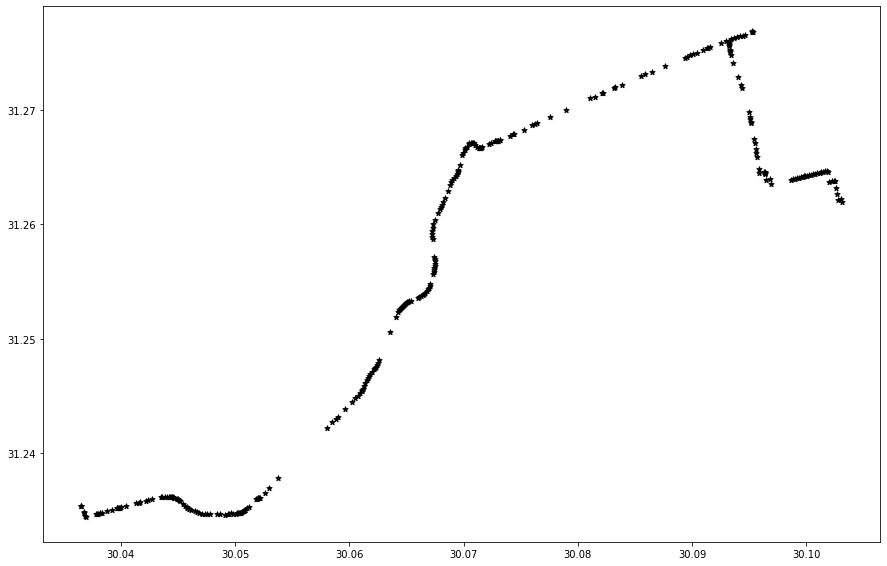

In [71]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (15,15))
g = geo_df.plot(ax=ax, markersize = 30, color = 'black',marker = '*')
plt.show()

In [83]:
v=[]
for i in routeLatLons:
    o=i[0]
    u=i[1]
    c={
      
        "coordinates": [
          o,
          u
        ]}
    
  
    v.append(c)
a=[]
for i in v:
  s=i['coordinates']
  a.append(s)

# v=''.join(str(v).split(','))
print(a)

[[30.0365025, 31.2353784], [30.0365119, 31.2353654], [30.0365471, 31.2353167], [30.036748, 31.2348752], [30.0368188, 31.2347223], [30.0368917, 31.2344647], [30.0369224, 31.2343562], [30.0378325, 31.2346213], [30.0379351, 31.2346512], [30.0380281, 31.2346783], [30.0381386, 31.2347105], [30.0382122, 31.2347319], [30.0383133, 31.2347613], [30.0387998, 31.2349031], [30.0392556, 31.2350358], [30.0396218, 31.2351475], [30.0396413, 31.2351533], [30.0397932, 31.2351984], [30.0398745, 31.2352158], [30.039936, 31.2352279], [30.0400266, 31.2352292], [30.0404491, 31.2353486], [30.041311, 31.2355899], [30.0415544, 31.2356584], [30.0417117, 31.2357023], [30.0421743, 31.2358287], [30.0423346, 31.2358703], [30.0427653, 31.2359776], [30.0435454, 31.2361492], [30.0436441, 31.236164], [30.0438519, 31.2361707], [30.0440365, 31.2361532], [30.0442275, 31.2361143], [30.044292, 31.2361465], [30.0443605, 31.2361643], [30.0444499, 31.2361654], [30.0445371, 31.2361422], [30.0446172, 31.236096], [30.0446856, 31.2